### Step 1: Importing Libraries
We begin by importing `pandas` for data manipulation and `matplotlib` for visualization.


In [92]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


### Step 2: Load datasets
We load the data sets and display the first rows to understand the structure of each of the files.

In [93]:
# Load the datasets
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')

# Display the first few rows of each dataset
cab_data.head(), city_data.head(), customer_data.head(), transaction_data.head()


(   Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
              City   Population      Users
 0     NEW YORK NY   8,405,837    302,149 
 1      CHICAGO IL   1,955,130    164,468 
 2  LOS ANGELES CA   1,595,037    144,132 
 3        MIAMI FL   1,339,155     17,675 
 4  SILICON VALLEY   1,177,609     27,247 ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               

### Step 3: Understand Field Names and Data Types
We use the `info()` method to display:
- The column names.
- Data types of each column.
- Number of non-null entries in each column.

This will help us understand if any field transformations are needed (e.g., converting data types) and if there are missing values to address.


In [94]:
# Get information about the datasets (column names and data types)
cab_data.info()
city_data.info()
customer_data.info()
transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

### Quality Check for Cab_Data.csv
We perform the following data quality checks:
1. **Duplicates**: We check if there are any duplicate rows in `Cab_Data.csv` and remove them if found.
2. **Missing Values**: We check for missing values in each column.


In [95]:
# Check for duplicates in Cab_Data.csv
cab_duplicates = cab_data.duplicated().sum()
print(f"Number of duplicate rows in Cab_Data.csv: {cab_duplicates}")

# Remove duplicates if any
cab_data = cab_data.drop_duplicates()

# Check for missing values in Cab_Data.csv
cab_missing = cab_data.isnull().sum()
print("Missing values in Cab_Data.csv:")
print(cab_missing)

# Check for duplicates in City.csv
city_duplicates = city_data.duplicated().sum()
print(f"Number of duplicate rows in City.csv: {city_duplicates}")

# Remove duplicates if any
city_data = city_data.drop_duplicates()

# Check for missing values in City.csv
city_missing = city_data.isnull().sum()
print("Missing values in City.csv:")
print(city_missing)

# Check for duplicates in Customer_ID.csv
customer_duplicates = customer_data.duplicated().sum()
print(f"Number of duplicate rows in Customer_ID.csv: {customer_duplicates}")

# Remove duplicates if any
customer_data = customer_data.drop_duplicates()

# Check for missing values in Customer_ID.csv
customer_missing = customer_data.isnull().sum()
print("Missing values in Customer_ID.csv:")
print(customer_missing)

# Check for duplicates in Transaction_ID.csv
transaction_duplicates = transaction_data.duplicated().sum()
print(f"Number of duplicate rows in Transaction_ID.csv: {transaction_duplicates}")

# Remove duplicates if any
transaction_data = transaction_data.drop_duplicates()

# Check for missing values in Transaction_ID.csv
transaction_missing = transaction_data.isnull().sum()
print("Missing values in Transaction_ID.csv:")
print(transaction_missing)



Number of duplicate rows in Cab_Data.csv: 0
Missing values in Cab_Data.csv:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Number of duplicate rows in City.csv: 0
Missing values in City.csv:
City          0
Population    0
Users         0
dtype: int64
Number of duplicate rows in Customer_ID.csv: 0
Missing values in Customer_ID.csv:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Number of duplicate rows in Transaction_ID.csv: 0
Missing values in Transaction_ID.csv:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64



- The key relationships between the files are:
  - `Cab_Data.csv` and `Transaction_ID.csv` can be linked using the `Transaction ID` column.
  - `Transaction_ID.csv` and `Customer_ID.csv` can be linked using the `Customer ID` column.
  - `Cab_Data.csv` and `City.csv` can be linked using the `City` column.

We will preview these columns to ensure they are compatible for joining.


In [96]:
# Preview key columns that can be used for joining
cab_data[['Transaction ID', 'City', 'Company']].head()
transaction_data[['Transaction ID', 'Customer ID', 'Payment_Mode']].head()
customer_data[['Customer ID', 'Gender', 'Age', 'Income (USD/Month)']].head()
city_data[['City', 'Population', 'Users']].head()

# warning: notebook is only displaying the last one


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Step 4: Field/Feature Transformations
We convert the `Population` and `Users` columns in the `City.csv` file from strings to numeric values by removing commas and coercing any errors to NaN. This ensures we can perform mathematical operations on these fields later in the analysis.


In [97]:
# Convert population and users columns to numeric in city_data
city_data['Population'] = pd.to_numeric(city_data['Population'].str.replace(',', ''), errors='coerce')
city_data['Users'] = pd.to_numeric(city_data['Users'].str.replace(',', ''), errors='coerce')

# Verify changes
city_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


### Step 5: Determine Which Files Should Be Joined vs. Appended
We will:
- **Join** `Cab_Data.csv` with `Transaction_ID.csv` on `Transaction ID` to include customer payment information.
- **Join** the result with `Customer_ID.csv` on `Customer ID` to include demographic information.
- **Join** the result with `City.csv` on `City` to add geographic information.

This will result in a master dataset that contains all the necessary fields for analysis.


In [98]:
# Merge cab_data with transaction_data on 'Transaction ID'
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')

# Merge the result with customer_data on 'Customer ID'
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

# Merge the result with city_data on 'City'
master_data = pd.merge(merged_data, city_data, on='City')

# Check the final master dataset
master_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


### Step 6: Create Master Data and Explain the Relationship
We have created a master dataset that includes:
- Transaction details (from `Cab_Data.csv`).
- Payment information (from `Transaction_ID.csv`).
- Customer demographics (from `Customer_ID.csv`).
- Geographic data (from `City.csv`).

This master dataset is ready for further analysis.


In [99]:
# Display the master dataset's structure
master_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 38.4+ MB


### Step 7: Perform Other Analysis: Outliers
We:
- Check for missing values in the master dataset to determine if any fields need imputation or cleaning.
- Use `describe()` to identify potential outliers in the numeric columns (such as extreme values in price or distance traveled).



In [100]:
# Check for missing values
print(master_data.isnull().sum())

# Describe the numerical columns to check for outliers
master_data.describe()


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


The previous table is slightly nonsensical for many of the variables, like: transaction ID, date of travel and customer ID. Also, the date appears in serial number format. So we will change that. 

In [101]:
# Convert 'Date of Travel' from serial number to date format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Display the first few rows to verify the change
cab_data[['Date of Travel']].head()


,Date of Travel
0,2016-01-08
1,2016-01-06
2,2016-01-02
3,2016-01-07
4,2016-01-03


## Part 2: Statistical data analysis:
Now that we have understood the structure of the data files that we are working with and some of the basic information we begin a more thorough treatment of the data. Following the EDA document, the first step is the statistical data analysis.

### Descriptive analysis (univariate analysis)

We go deeper into some of the work we have just done, and create some other features (derived features) that might be of interest for us, since the make explicit infomration that is already in the data sets in a more hidden way.

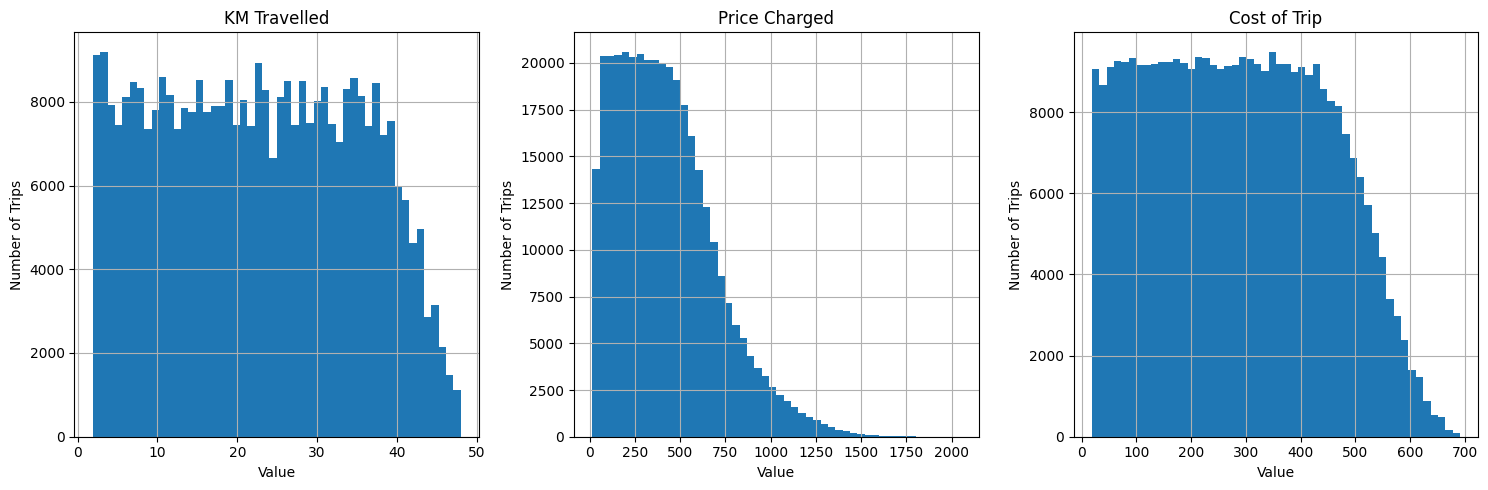

In [102]:
# Descriptive statistics for numerical columns in the cab data


# Increase the number of bins to make the histograms more detailed
bins = 50  

# Plot histograms for numerical columns with adjusted bins
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots for each numerical column

# Plot each column
cab_data['KM Travelled'].hist(bins=bins, ax=axes[0])
axes[0].set_title('KM Travelled')
axes[0].set_ylabel('Number of Trips')

cab_data['Price Charged'].hist(bins=bins, ax=axes[1])
axes[1].set_title('Price Charged')

cab_data['Cost of Trip'].hist(bins=bins, ax=axes[2])
axes[2].set_title('Cost of Trip')

# Add y-label "Number of Trips" for all subplots
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of Trips')

plt.tight_layout()  # Adjust layout so the plots don't overlap
plt.show()



We want another column in the Cab_Data file, which is one accounting for the profit generated in each trip.

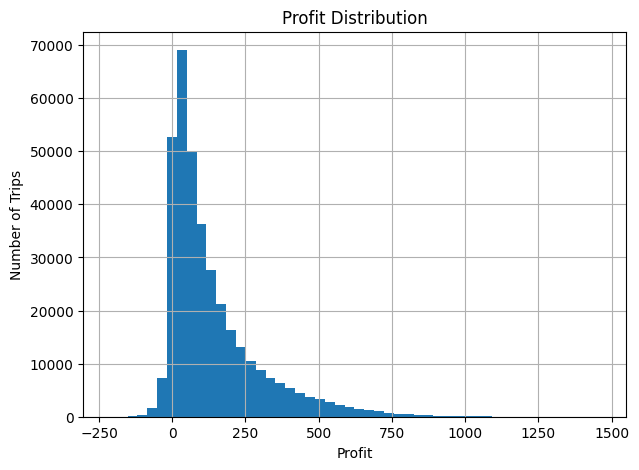

In [103]:
# Create a new column 'Profit' which is Price Charged minus Cost of Trip
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Plot histogram for the 'Profit' column
plt.figure(figsize=(7, 5))
cab_data['Profit'].hist(bins=50)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Number of Trips')
plt.show()


No we show the number of trips per each of the categorical variables that appear in Data_Cab

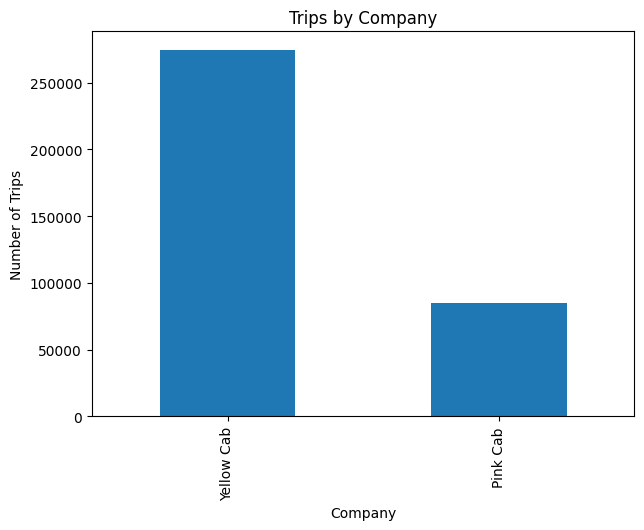

In [104]:
# Histogram for trips done by each company
cab_data['Company'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.title('Trips by Company')
plt.xlabel('Company')
plt.ylabel('Number of Trips')
plt.show()


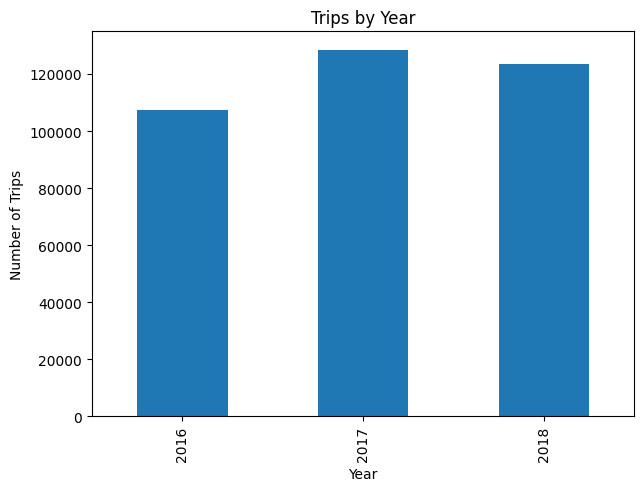

In [105]:

# Convert 'Date of Travel' to datetime if necessary
if cab_data['Date of Travel'].dtype != 'datetime64[ns]':
    cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extract the year from 'Date of Travel'
cab_data['Year'] = cab_data['Date of Travel'].dt.year

# Histogram for trips done per year
cab_data['Year'].value_counts().sort_index().plot(kind='bar', figsize=(7, 5))
plt.title('Trips by Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.show()



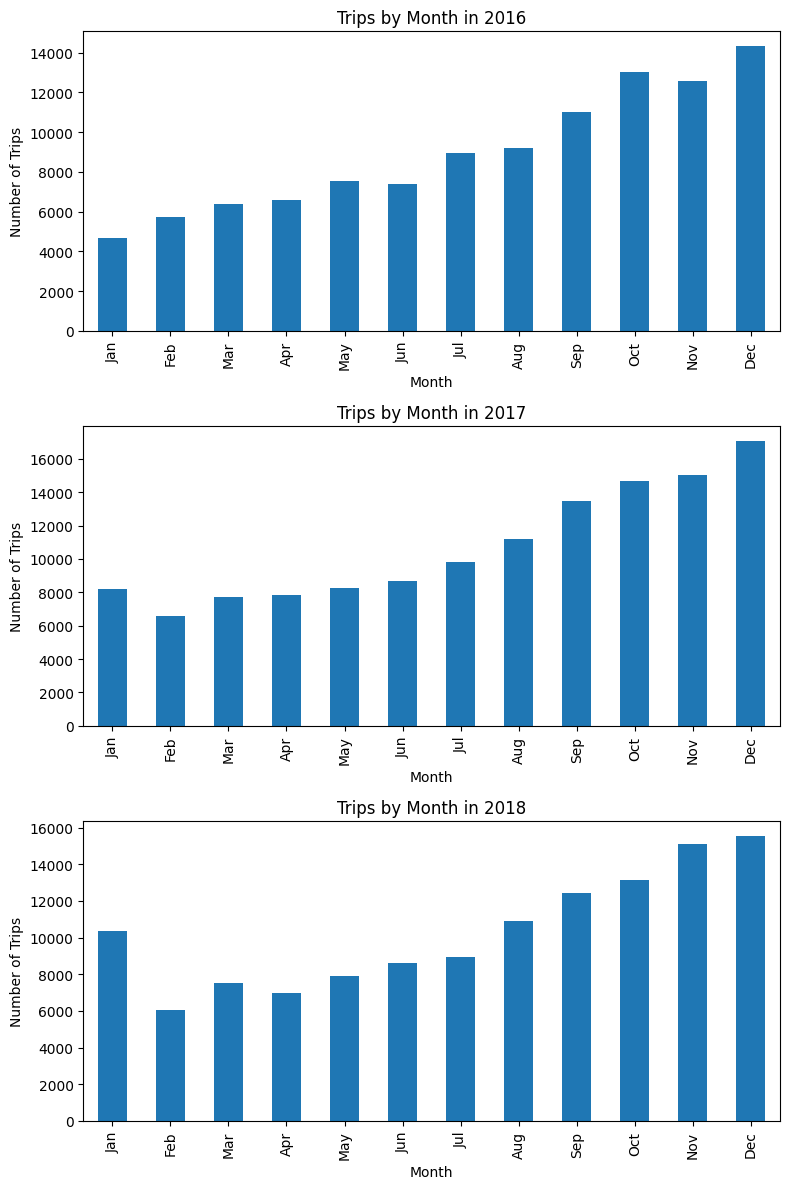

In [106]:
# Convert 'Date of Travel' to datetime if necessary
if cab_data['Date of Travel'].dtype != 'datetime64[ns]':
    cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extract the year and month from 'Date of Travel'
cab_data['Year'] = cab_data['Date of Travel'].dt.year
cab_data['Month'] = cab_data['Date of Travel'].dt.month

# Filter data by year
data_2016 = cab_data[cab_data['Year'] == 2016]
data_2017 = cab_data[cab_data['Year'] == 2017]
data_2018 = cab_data[cab_data['Year'] == 2018]

# Create subplots for each year
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Histogram for 2016
data_2016['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Trips by Month in 2016')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Trips')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Histogram for 2017
data_2017['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Trips by Month in 2017')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Trips')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Histogram for 2018
data_2018['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Trips by Month in 2018')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Trips')
axes[2].set_xticks(range(12))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()
plt.show()



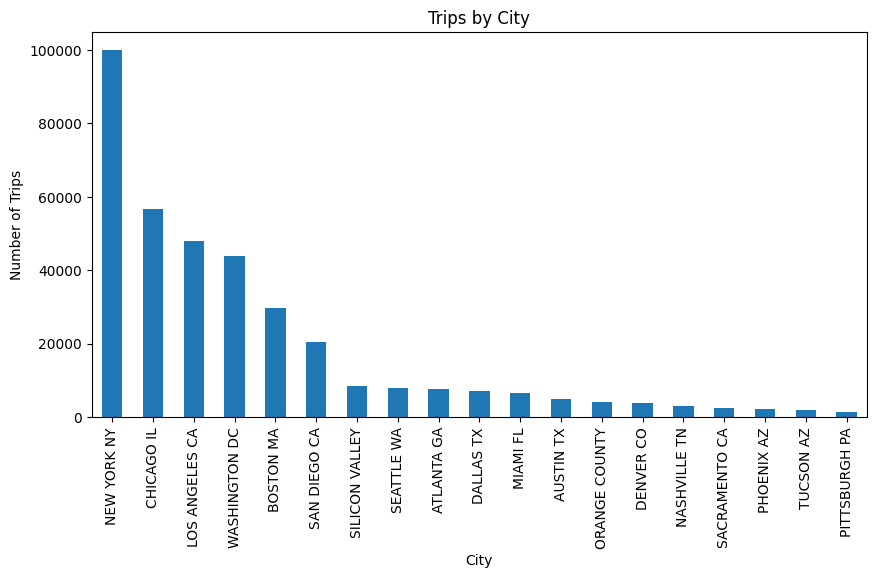

In [107]:
# Histogram for trips done by city
cab_data['City'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Trips by City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.show()

Now we move into the transactions file

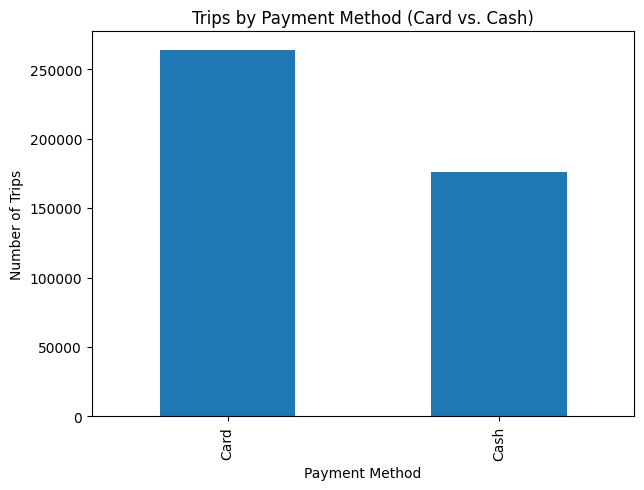

In [108]:
# Create a histogram for payment methods from the transaction_data file
transaction_data['Payment_Mode'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.title('Trips by Payment Method (Card vs. Cash)')
plt.xlabel('Payment Method')
plt.ylabel('Number of Trips')
plt.show()



Although for further analysis we will have to use the data from the **merged_data file since some of the transactions have an ID which does not appear in the **data_cab file, so we cannot relate them to other variables.

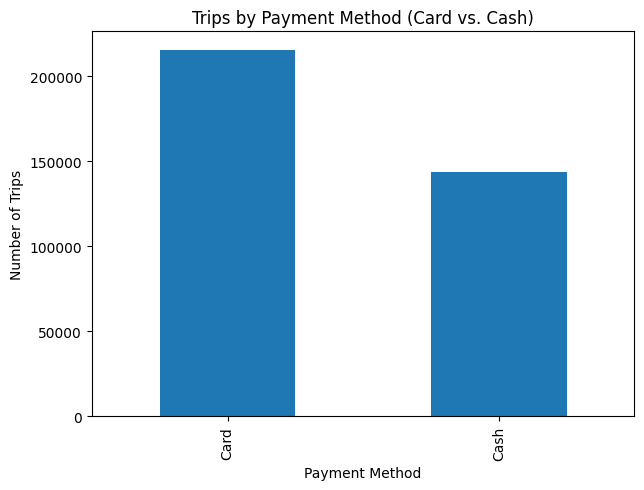

In [109]:
# Create a histogram for trips based on Payment Mode (Card vs. Cash)
merged_data['Payment_Mode'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.title('Trips by Payment Method (Card vs. Cash)')
plt.xlabel('Payment Method')
plt.ylabel('Number of Trips')
plt.show()

Now we move into customer_id. We will number of customers with respect to the rest of the variables.

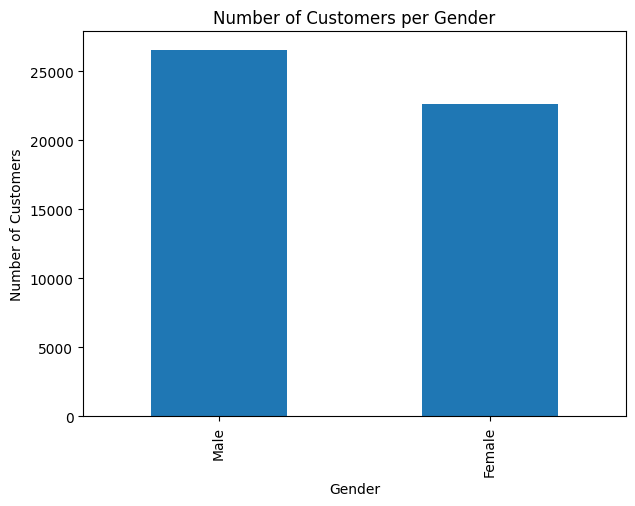

In [110]:
# Histogram for number of customers per gender
customer_data['Gender'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.title('Number of Customers per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


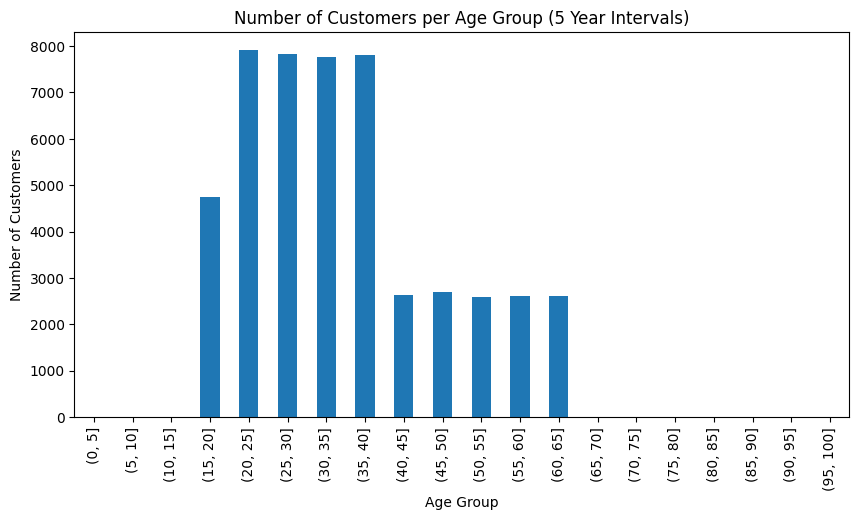

In [111]:
# Create age groups in intervals of 5 years
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=range(0, 105, 5))

# Histogram for number of customers per age group
customer_data['Age Group'].value_counts(sort=False).plot(kind='bar', figsize=(10, 5))
plt.title('Number of Customers per Age Group (5 Year Intervals)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


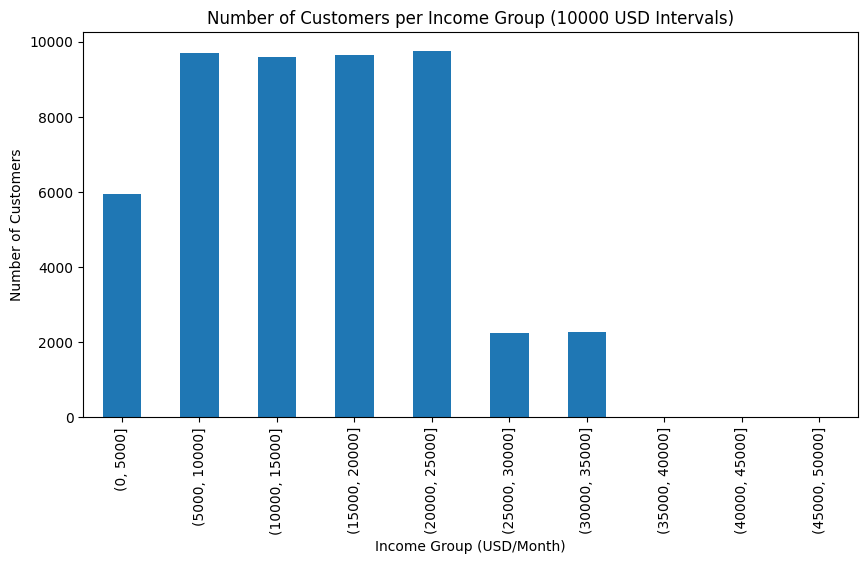

In [112]:
# Create income groups in intervals of 10000 USD
customer_data['Income Group'] = pd.cut(customer_data['Income (USD/Month)'], bins=range(0, 50001, 5000))

# Histogram for number of customers per income group
customer_data['Income Group'].value_counts(sort=False).plot(kind='bar', figsize=(10, 5))
plt.title('Number of Customers per Income Group (10000 USD Intervals)')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Number of Customers')
plt.show()


To finish, the file *city* is small enough so that we can print it in its entirety

In [113]:
print(city_data.to_string())

                City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021


### Correlation analysis

Having visualised all the different features that appear in our data, now we move into the task of trying to find relations between some of thos variables. We will begin by 'mixing up' the histograms.

#### Descriptive analysis
Our goal is to explore relations between variables and see if we can spot any patterns for further analysis.

Payment_Mode    Card    Cash
Company                     
Pink Cab       50916   33795
Yellow Cab    164626  110055


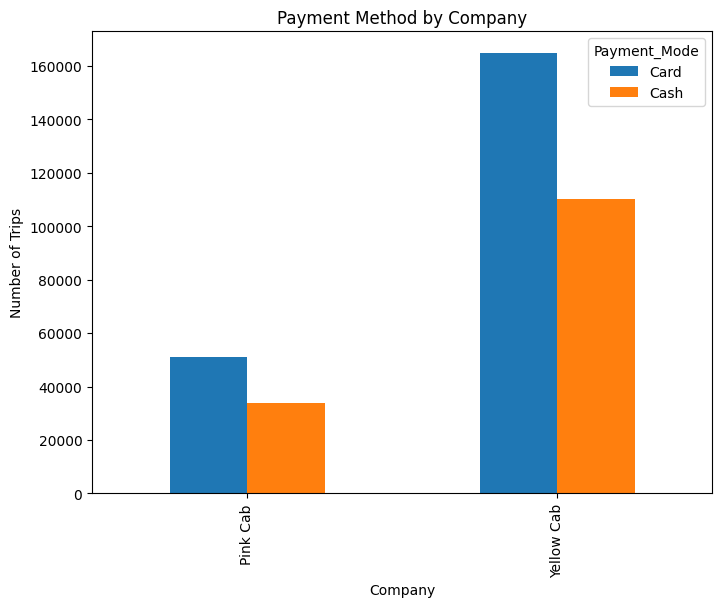

In [114]:
# Cross-tabulation between Company and Payment Method
company_payment_ct = pd.crosstab(cab_data['Company'], transaction_data['Payment_Mode'])

# Print the contingency table
print(company_payment_ct)

# Bar plot to visualize the relationship
company_payment_ct.plot(kind='bar', figsize=(8, 6))
plt.title('Payment Method by Company')
plt.xlabel('Company')
plt.ylabel('Number of Trips')
plt.show()


Payment_Mode    Card   Cash
Gender                     
Female         92025  61455
Male          123479  82433


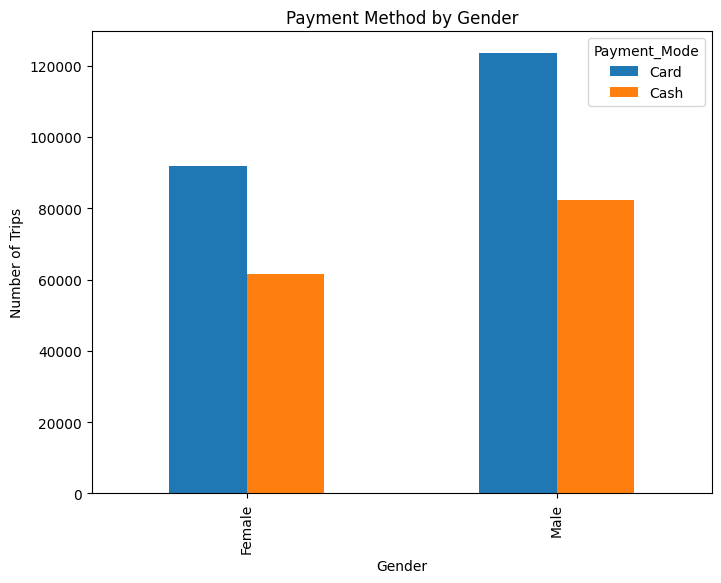

In [115]:
# Merge cab_data with customer_data to get gender information
merged_data_gender = pd.merge(cab_data, transaction_data, how='left', on='Transaction ID')
merged_data_gender = pd.merge(merged_data_gender, customer_data, how='left', on='Customer ID')

# Cross-tabulation between Gender and Payment Method
gender_payment_ct = pd.crosstab(merged_data_gender['Gender'], merged_data_gender['Payment_Mode'])

# Print the contingency table
print(gender_payment_ct)

# Bar plot to visualize the relationship
gender_payment_ct.plot(kind='bar', figsize=(8, 6))
plt.title('Payment Method by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()


Payment_Mode     Card   Cash
City                        
ATLANTA GA       4489   3068
AUSTIN TX        2916   1980
BOSTON MA       17869  11823
CHICAGO IL      33821  22804
DALLAS TX        4108   2909
DENVER CO        2274   1551
LOS ANGELES CA  28865  19168
MIAMI FL         3903   2551
NASHVILLE TN     1820   1190
NEW YORK NY     59851  40034
ORANGE COUNTY    2439   1543
PHOENIX AZ       1262    802
PITTSBURGH PA     768    545
SACRAMENTO CA    1430    937
SAN DIEGO CA    12364   8124
SEATTLE WA       4825   3172
SILICON VALLEY   5040   3479
TUCSON AZ        1187    744
WASHINGTON DC   26311  17426


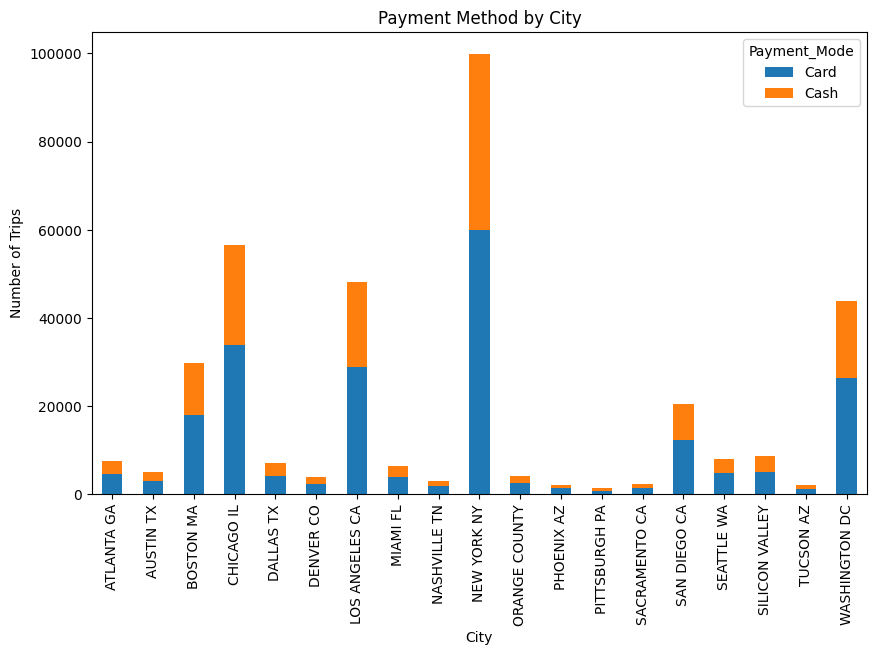

In [116]:
# Cross-tabulation between City and Payment Method
city_payment_ct = pd.crosstab(cab_data['City'], transaction_data['Payment_Mode'])

# Print the contingency table
print(city_payment_ct)

# Bar plot to visualize the relationship
city_payment_ct.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Payment Method by City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()


Company  Pink Cab  Yellow Cab
Gender                       
Female      37480      116000
Male        47231      158681


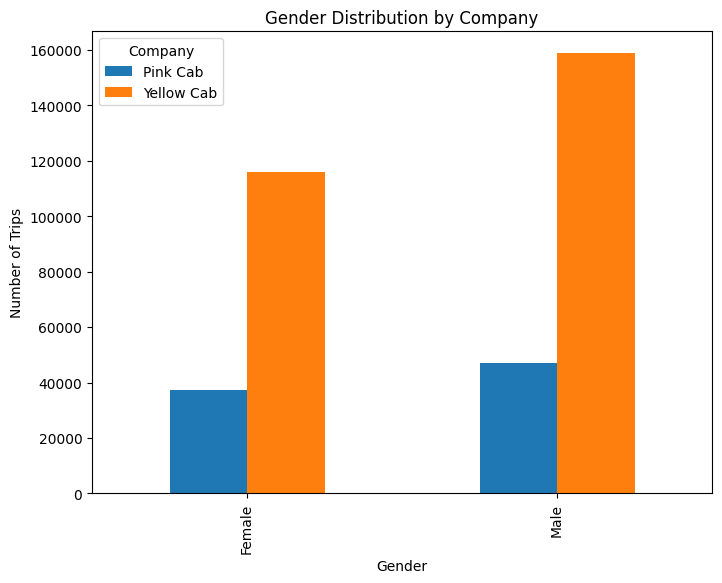

In [117]:
# Cross-tabulation between Gender and Company
gender_company_ct = pd.crosstab(master_data['Gender'], master_data['Company'])

# Print the contingency table
print(gender_company_ct)

# Bar plot to visualize the relationship
gender_company_ct.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Company')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

Company    Pink Cab  Yellow Cab
Age Group                      
(10, 20]       8350       26316
(20, 30]      27203       88163
(30, 40]      26556       86550
(40, 50]       9119       30451
(50, 60]       8897       28876
(60, 70]       4586       14325


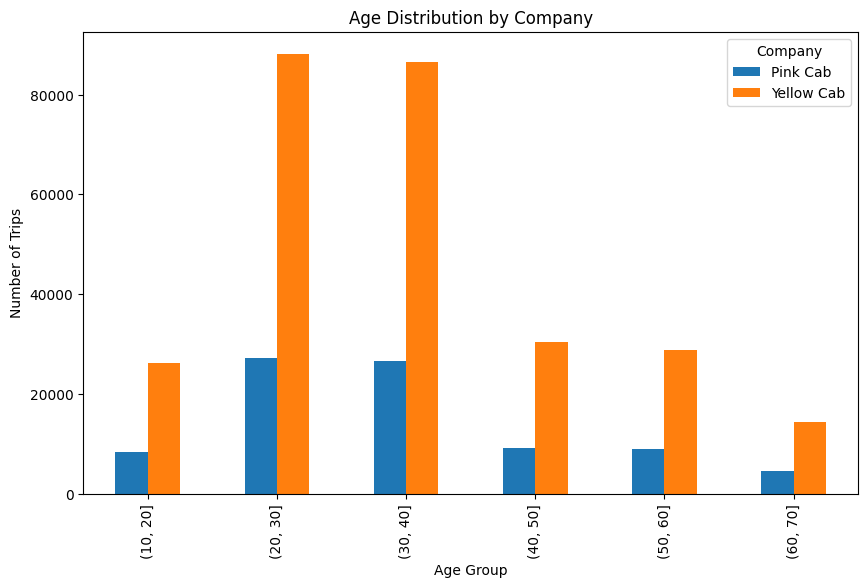

In [118]:
# Create age groups in intervals of 10 years
master_data['Age Group'] = pd.cut(master_data['Age'], bins=range(0, 101, 10))

# Cross-tabulation between Age Group and Company
age_company_ct = pd.crosstab(master_data['Age Group'], master_data['Company'])

# Print the contingency table
print(age_company_ct)

# Bar plot to visualize the relationship
age_company_ct.plot(kind='bar', figsize=(10, 6))
plt.title('Age Distribution by Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.show()

Company         Pink Cab  Yellow Cab
Income Group                        
(0, 5000]          10117       32333
(5000, 10000]      16585       53675
(10000, 15000]     16553       54609
(15000, 20000]     16716       54556
(20000, 25000]     16943       54409
(25000, 30000]      3859       12474
(30000, 35000]      3938       12625


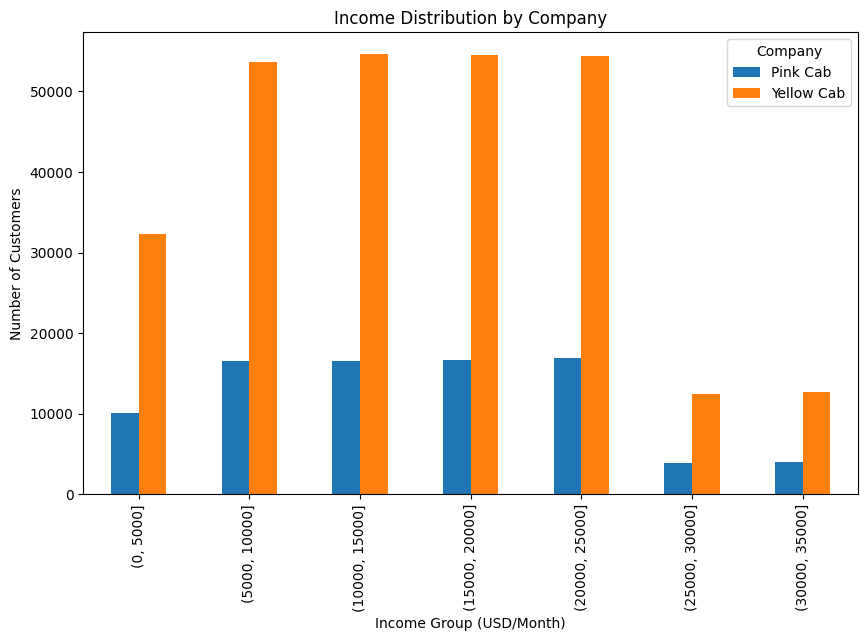

In [119]:
# Create income groups in intervals of 10000 USD
master_data['Income Group'] = pd.cut(master_data['Income (USD/Month)'], bins=range(0, 50001, 5000))

# Cross-tabulation between Income Group and Company
income_company_ct = pd.crosstab(master_data['Income Group'], master_data['Company'])

# Print the contingency table
print(income_company_ct)

# Bar plot to visualize the relationship
income_company_ct.plot(kind='bar', figsize=(10, 6))
plt.title('Income Distribution by Company')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Number of Customers')
plt.show()

At a first glance there seems to not be a big relation between groups of people according to some trait and their choice of company.

Gender
Female    22.586388
Male      22.552992
Name: KM Travelled, dtype: float64


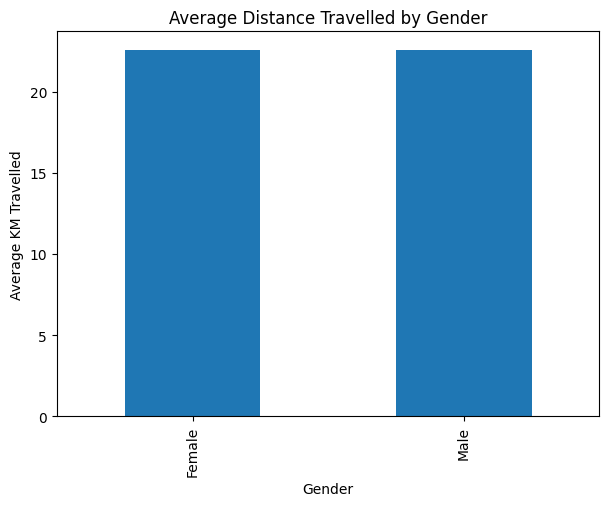

In [120]:
avg_distance_gender = master_data.groupby('Gender')['KM Travelled'].mean()

# Print the average distance for each gender
print(avg_distance_gender)

# Bar plot to visualize the average distance traveled by gender
avg_distance_gender.plot(kind='bar', figsize=(7, 5))
plt.title('Average Distance Travelled by Gender')
plt.xlabel('Gender')
plt.ylabel('Average KM Travelled')
plt.show()

Income Group
(0, 5000]         22.565684
(5000, 10000]     22.561862
(10000, 15000]    22.581314
(15000, 20000]    22.606076
(20000, 25000]    22.515327
(25000, 30000]    22.640189
(30000, 35000]    22.518470
Name: KM Travelled, dtype: float64


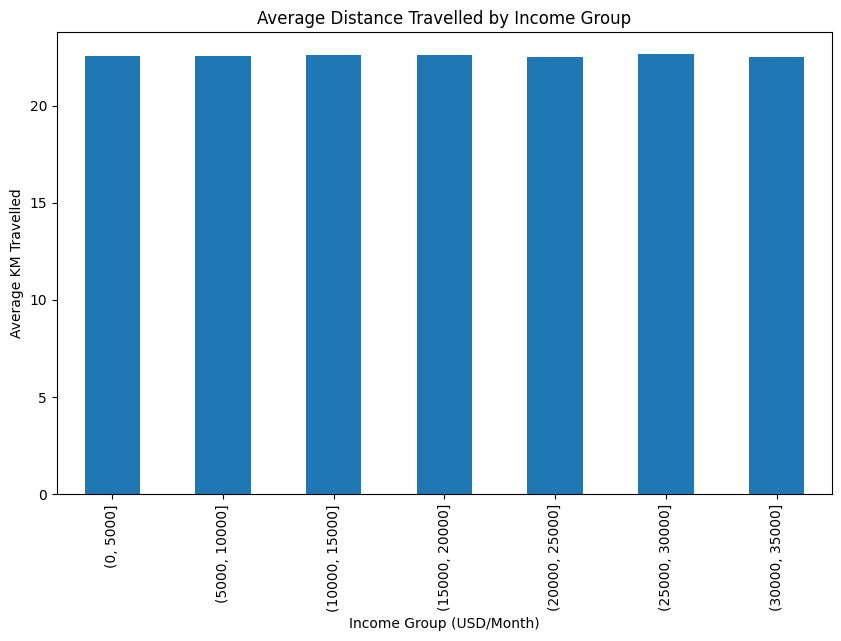

In [121]:
master_data['Income Group'] = pd.cut(master_data['Income (USD/Month)'], bins=range(0, 50001, 5000))

# Group by Income Group and calculate the average distance (KM Travelled)
avg_distance_income = master_data.groupby('Income Group', observed=True)['KM Travelled'].mean()

# Print the average distance for each income group
print(avg_distance_income)

# Bar plot to visualize the average distance traveled by income group
avg_distance_income.plot(kind='bar', figsize=(10, 6))
plt.title('Average Distance Travelled by Income Group')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Average KM Travelled')
plt.show()


Age Group
(10, 20]    22.549171
(20, 30]    22.567162
(30, 40]    22.562835
(40, 50]    22.609037
(50, 60]    22.610711
(60, 70]    22.453161
Name: KM Travelled, dtype: float64


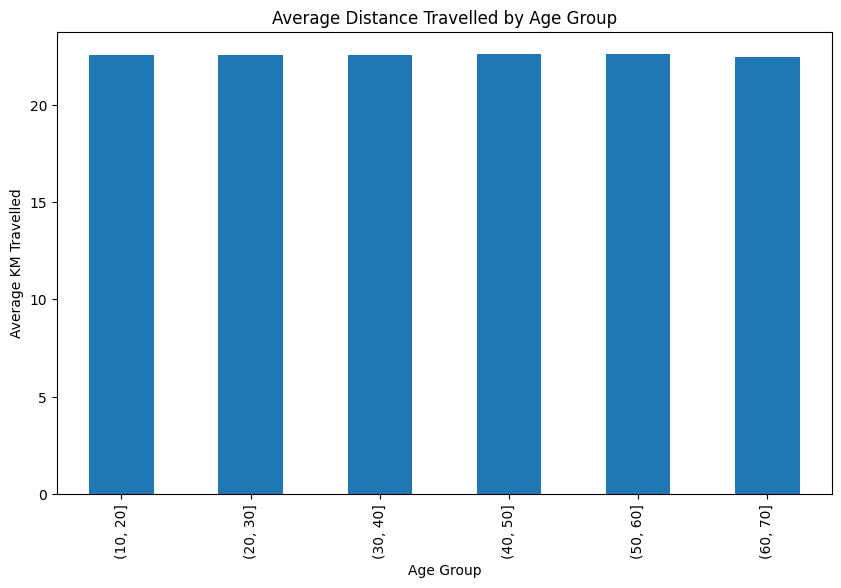

In [122]:
# Ensure age groups are created
master_data['Age Group'] = pd.cut(master_data['Age'], bins=range(0, 101, 10))

# Group by Age Group and calculate the average distance (KM Travelled) 
avg_distance_age = master_data.groupby('Age Group', observed=True)['KM Travelled'].mean()

# Print the average distance for each age group
print(avg_distance_age)

# Bar plot to visualize the average distance traveled by age group
avg_distance_age.plot(kind='bar', figsize=(10, 6))
plt.title('Average Distance Travelled by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average KM Travelled')
plt.show()



We see no relation between distance travelled and different groups of people.

No we focus in trying to understand the profit. First we include the column Profit in master_data

In [123]:
# Add the 'Profit' column (Price Charged - Cost of Trip)
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

# Display the first few rows to confirm the Profit column has been added
master_data[['Price Charged', 'Cost of Trip', 'Profit']].head()



,Price Charged,Cost of Trip,Profit
0,370.95,313.635,57.315
1,358.52,334.854,23.666
2,125.20,97.632,27.568
3,377.40,351.602,25.798
4,114.62,97.776,16.844


Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


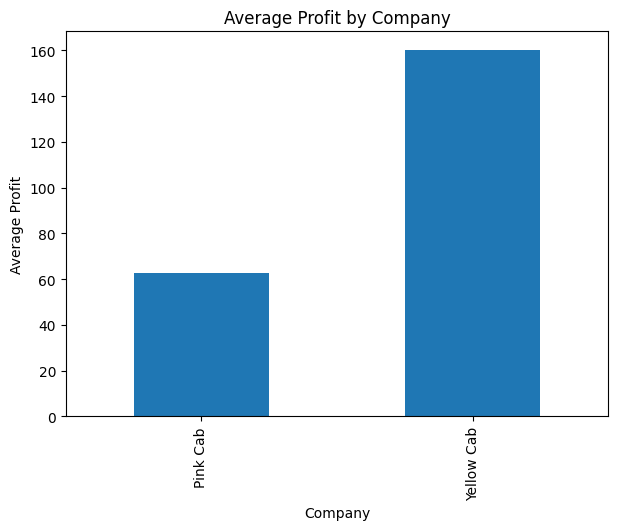

In [124]:
# Group by Company and calculate the average profit
avg_profit_company = master_data.groupby('Company')['Profit'].mean()

# Print the average profit for each company
print(avg_profit_company)

# Bar plot to visualize the average profit by company
avg_profit_company.plot(kind='bar', figsize=(7, 5))
plt.title('Average Profit by Company')
plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.show()



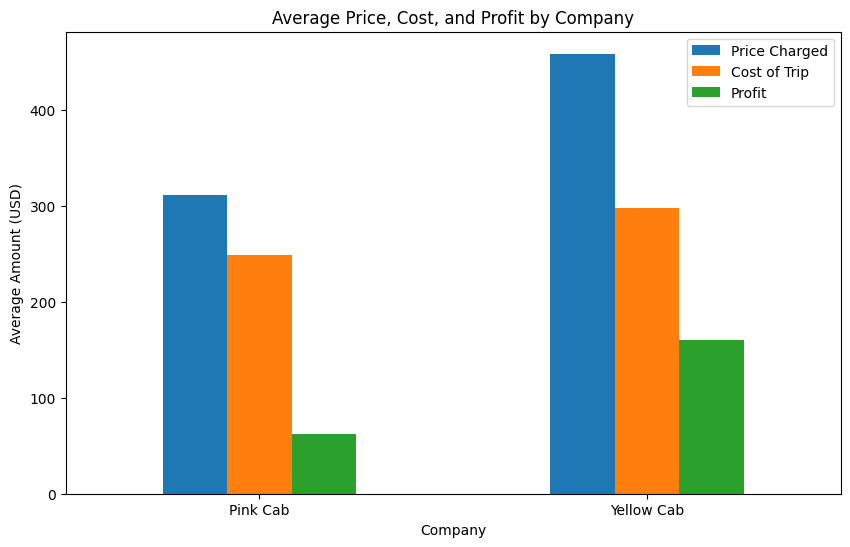

In [125]:
# Group by Company and calculate the average Price, Cost, and Profit
avg_price_cost_profit = master_data.groupby('Company').agg({
    'Price Charged': 'mean',
    'Cost of Trip': 'mean',
    'Profit': 'mean'
})

# Plot the result in a bar plot with Price, Cost, and Profit
avg_price_cost_profit.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Average Price, Cost, and Profit by Company')
plt.xlabel('Company')
plt.ylabel('Average Amount (USD)')
plt.xticks(rotation=0)
plt.legend(['Price Charged', 'Cost of Trip', 'Profit'])
plt.show()

City
ATLANTA GA        111.477158
AUSTIN TX         107.577824
BOSTON MA          59.568883
CHICAGO IL         59.820104
DALLAS TX         160.856957
DENVER CO         103.943793
LOS ANGELES CA     91.847452
MIAMI FL          117.493220
NASHVILLE TN       49.678478
NEW YORK NY       279.947491
ORANGE COUNTY     114.766920
PHOENIX AZ         93.479109
PITTSBURGH PA      64.863638
SACRAMENTO CA      49.567466
SAN DIEGO CA       77.467955
SEATTLE WA         75.613962
SILICON VALLEY    154.561013
TUCSON AZ          72.636300
WASHINGTON DC      79.860762
Name: Profit, dtype: float64


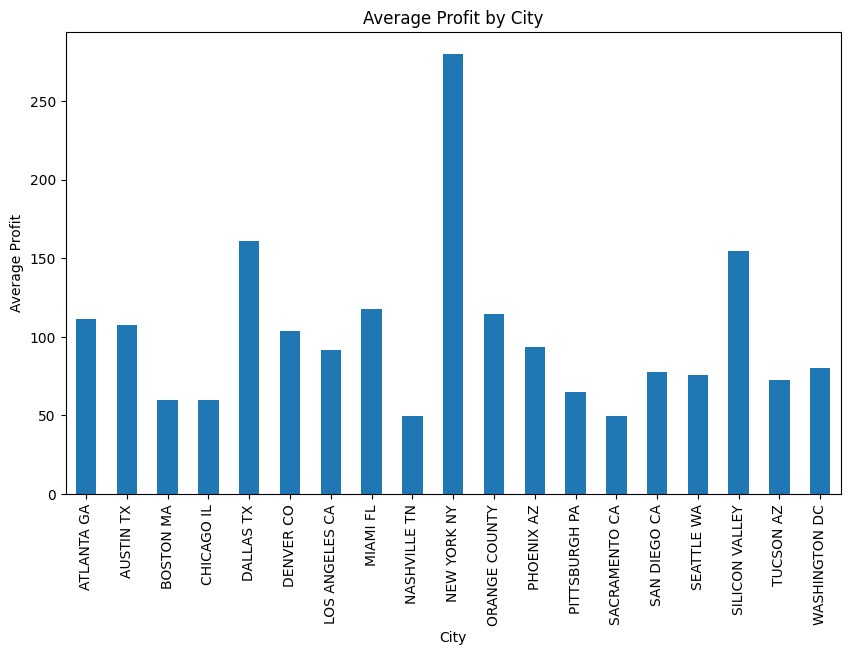

In [126]:
# Group by City and calculate the average profit
avg_profit_city = master_data.groupby('City')['Profit'].mean()

# Print the average profit for each city
print(avg_profit_city)

# Bar plot to visualize the average profit by city
avg_profit_city.plot(kind='bar', figsize=(10, 6))
plt.title('Average Profit by City')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.xticks(rotation=90)
plt.show()


Income Group
(0, 5000]         134.635148
(5000, 10000]     134.840614
(10000, 15000]    137.112353
(15000, 20000]    140.902995
(20000, 25000]    138.137886
(25000, 30000]    139.042765
(30000, 35000]    133.521133
Name: Profit, dtype: float64


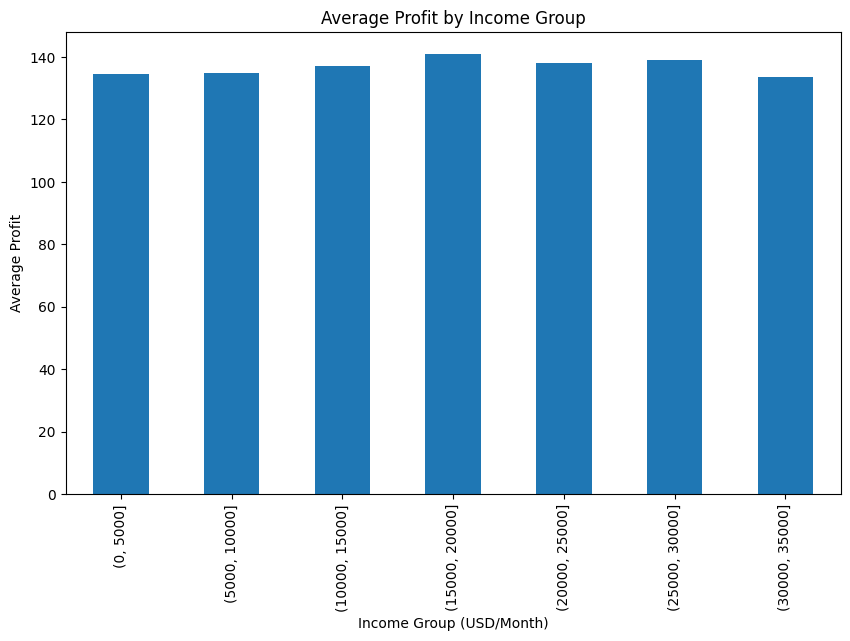

In [127]:
# Group by Income Group and calculate the average profit
avg_profit_income = master_data.groupby('Income Group', observed=True)['Profit'].mean()

# Print the average profit for each income group
print(avg_profit_income)

# Bar plot to visualize the average profit by income group
avg_profit_income.plot(kind='bar', figsize=(10, 6))
plt.title('Average Profit by Income Group')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Average Profit')
plt.show()


It seems that there ar no strong connections between groups and profit. We will focus in looking at the economic data on its own.

In [128]:
if master_data['Date of Travel'].dtype != 'datetime64[ns]':
    master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extract the year from 'Date of Travel'
master_data['Year'] = master_data['Date of Travel'].dt.year

# Function to create the table for a given year
def create_table_for_year(year):
    data_year = master_data[master_data['Year'] == year]
    
    table = data_year.groupby('Company').agg(
        Avg_Cost=('Cost of Trip', 'mean'),
        Avg_Price=('Price Charged', 'mean'),
        Avg_Profit=('Profit', 'mean'),
        Modal_Cost=('Cost of Trip', lambda x: x.mode()[0] if not x.mode().empty else None),
        Modal_Price=('Price Charged', lambda x: x.mode()[0] if not x.mode().empty else None),
        Modal_Profit=('Profit', lambda x: x.mode()[0] if not x.mode().empty else None),
        Total_Trips=('Transaction ID', 'count'),
        Total_Cost=('Cost of Trip', 'sum'),
        Total_Price=('Price Charged', 'sum'),
        Total_Profit=('Profit', 'sum')
    )
    
    return table

# Create tables for 2016, 2017, 2018
table_2016 = create_table_for_year(2016)
table_2017 = create_table_for_year(2017)
table_2018 = create_table_for_year(2018)

# Display the tables
print("Table for 2016")
print(table_2016)

print("\nTable for 2017")
print(table_2017)

print("\nTable for 2018")
print(table_2018)

Table for 2016
              Avg_Cost   Avg_Price  Avg_Profit  Modal_Cost  Modal_Price  \
Company                                                                   
Pink Cab    247.008294  315.330113   68.321819     428.400        47.20   
Yellow Cab  298.570481  467.918301  169.347821     471.744       444.59   

            Modal_Profit  Total_Trips    Total_Cost  Total_Price  Total_Profit  
Company                                                                         
Pink Cab            5.05        25080  6.194968e+06   7908479.23  1.713511e+06  
Yellow Cab         20.25        82239  2.455414e+07  38481133.18  1.392700e+07  

Table for 2017
              Avg_Cost   Avg_Price  Avg_Profit  Modal_Cost  Modal_Price  \
Company                                                                   
Pink Cab    248.836603  315.907442   67.070839     199.920        49.62   
Yellow Cab  297.822893  466.639950  168.817057     479.808       377.53   

            Modal_Profit  Total_Trips    To

### Conclusions:

After having looked at the relations that different variables show with each other we can assert the follwoing:

There is no relation between groups of people on the basis of gender, income, or age, and their preferences for one company or another. That is, they choice for one company or the other is independent of trait. One conclusion of this observation is that choosing to invest in one company or the other will not entail targetting different groups of people, so no strategy on that basis can come out of it. FOr instance, it could be the case that one of them was way more popular amongst the younger generations, or amongst those with higher income. If that was the case, creative investing strategies could be performed, but not in the given scenario.

Since there ar no significative difference between the two companies and their clients with respect to their correlations to other variables, we will only look at the economic data to make the investment decision.

Looking at the costs, the prices and the profit in average per trip, in total, and accross the years, we see that the Yellow cab company is consistently better than the pink. Therefore, we recomend investing in the Yellow company. 

It is worth stressing that all the date included in the last table is relevant. It is not the case that the Yellow company is deacying while the Pink is going up (time progression). The Yellow company is more profitable in the average trip. But also, it is more popular, so it makes more trips, so the total profit is even greater. It could be the case that the yellow company was more efficient, that is better average profit, but less famous, so that with less profit per trip, the Pink company was doing mor money. But again, that is really not the case. The Yellow company is consistently better across all parameters.